In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import control as ctl
import scipy as signal

Na pova, definir ws, rp, wp e rs escrevendo e desenhando o filtro, todos estes valores são colocados nas frequencias limite, ver "especificação" na apostila, aquele é o processo

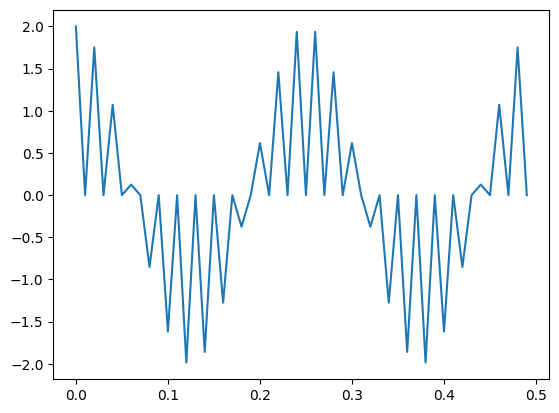

0.01


In [ ]:
#vendo o sinal
fs = 100
ts = 1/fs

s = [ 2.00000000,  0.00000000,  1.75261336,  9.99200722e-16,   1.07165359,  5.55111512e-16,  1.25581039e-01,  1.27675648e-15, -8.51558583e-01,  1.88737914e-15, -1.61803399,  1.33226763e-15,   -1.98422940, -1.11022302e-16, -1.85955297, -3.10862447e-15,  -1.27484798, -1.88737914e-15, -3.74762629e-01, -7.64666108e-15, 6.18033989e-01, -4.44089210e-15,  1.45793725, -8.88178420e-16, 1.93716632,  0.00000000,  1.93716632, -1.88737914e-15,   1.45793725,  1.35447209e-14,  6.18033989e-01,  5.55111512e-15, -3.74762629e-01,  8.49320614e-15, -1.27484798,  4.44089210e-16, -1.85955297,  5.55111512e-16, -1.98422940, -3.77475828e-15,  -1.61803399,  2.22044605e-16, -8.51558583e-01, -1.91235916e-14,   1.25581039e-01, -8.60422844e-15,  1.07165359,  8.88178420e-16, 1.75261336, -4.55191440e-15 ]
t = np.arange(0, len(s)*ts, ts)

plt.figure(1)
plt.plot(t,s)
plt.show()

print(ts)

NameError: name 's' is not defined

<TransferFunction>: sys[360]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


  0.2222
----------
z - 0.7778

dt = 0.01



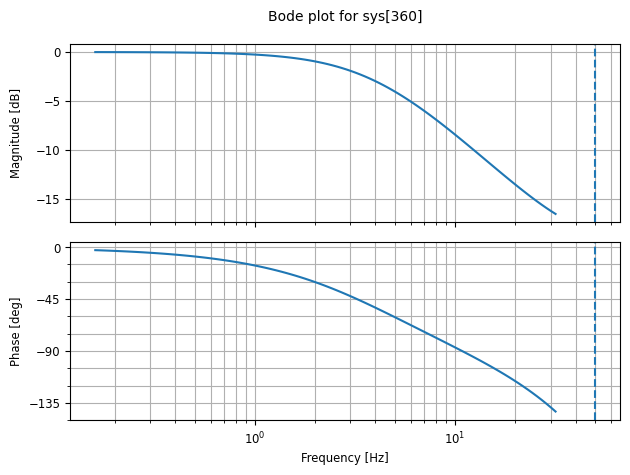

In [ ]:
z = ctl.tf('z')
z.dt = ts

# considerando a função de transferencia de um filtro passa baixa como H(z) = 1-e^(-wc*ts)/z-e^(-wc*ts) e wc = 2*pi*4
Hz = (1-np.exp(-2*np.pi*4*ts))/(z-np.exp(-2*np.pi*4*ts))

print(Hz)

w = np.logspace(0, 2.3, 100)
plt.figure(3)
ctl.bode(Hz, dB = True, Hz = True, omega = w)
plt.show()

0.22223232082821098
-0.777767679171789


<function matplotlib.pyplot.show(close=None, block=None)>

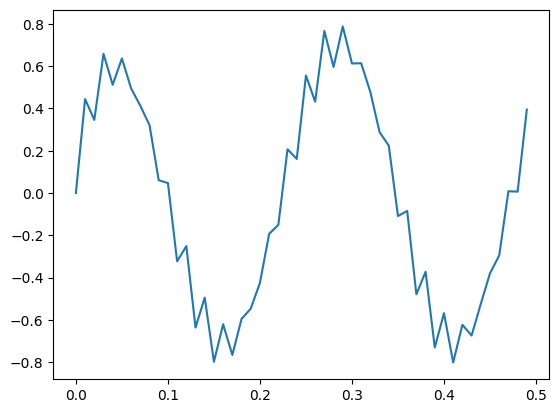

In [ ]:
#Aplicação do sinal

num, den = ctl.tfdata(Hz)
num = num[0][0]
den = den[0][0]

print(num[0])
print(den[1])

def sistemaTD(s):
    L = len(s)
    y = np.zeros(L)
    y[0] = 0
    for k in range(1, L):
        y[k] = num[0]*s[k-1]-den[1]*y[k-1]
    return y

y = sistemaTD(s)
plt.figure(5)
plt.plot(t,y)
plt.show

<StemContainer object of 3 artists>

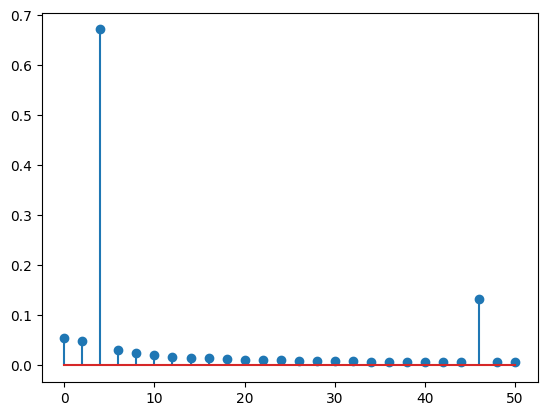

In [ ]:
N1 = len(y)

Y = np.fft.fft(y)
df = fs/N1
f1 = np.arange(0, fs, df)

plt.figure(4)
plt.clf
plt.stem(f[0:26], 2*abs(Y[0:26])/N1)

<function matplotlib.pyplot.show(close=None, block=None)>

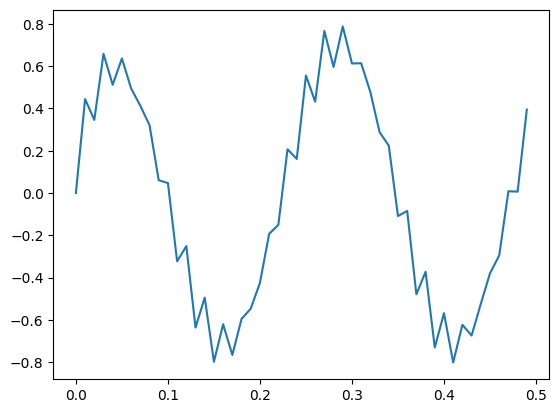

In [ ]:
def sistemaTR(s):
    y_1 = 0
    x_1 = 0
    o = np.zeros(L)

    k = 0
    x = s[0]
    while x != None:
        y = num[0]*x_1-den[1]*y_1

        o[k]=y
        y_1 = y
        x_1 = x
        k = k+1

        try:
            x = s[k]
        except:
            x = None
            k = k-1
    return o

o = sistemaTR(s)
plt.figure(7)
plt.plot(t,o)
plt.show

<StemContainer object of 3 artists>

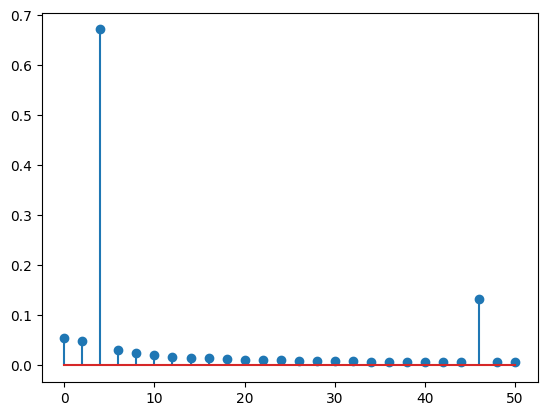

In [ ]:
N2 = len(o)

O = np.fft.fft(o)
df = fs/N2
f2 = np.arange(0, fs, df)

plt.figure(6)
plt.clf
plt.stem(f2[0:26], 2*abs(O[0:26])/N2)